In [7]:
#PART A: 

# Import all neccessary Library, and set variables for shortscuts. 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# creating and empty DataFrame:
df = pd.DataFrame()

#reading data set "Cancer", storing it to Pandas DataFrame. 
df = pd.read_csv('/Users/christophercarlson/Desktop/DataScience/HW1/Cancer.csv')

#checking if file was read in correctly from local machine. 
#print(df)

In [8]:
# PART B: 

# Creating list of dataset features.
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
                'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

# Initialize variable "X" to the features
X = df[feature_cols] 

# Initialize "y" to the targert.
y = df['Malignant_Cancer']

# Splitting up training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)



In [9]:
# PART C:

#TRAINING ONLY ON THE TRAINING SET. 

# "my_decisiontree" is instantiated as an "object" of 
# DecisionTreeClassifier "class". 

my_decisiontree = DecisionTreeClassifier(random_state=2)

# We can use the method "fit" of the objects "my_decisiontree"
# along with training dataset and labels to train the model.
my_decisiontree.fit(X, y)
my_decisiontree.fit(X_train, y_train)

# Testing on the testing set:

y_predict = my_decisiontree.predict(X_test)

# Print Accuracy: 

accuracy = accuracy_score(y_test, y_predict)
print("{}{}".format("Accuracy: ", accuracy))

# Creating the area under curve(AUC):

# Predicting the Binary Label:
y_predict = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_decisiontree.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

DecisionTreeAUC = metrics.auc(fpr, tpr)
print("AUC:" , DecisionTreeAUC )


Accuracy: 0.8666666666666667
AUC: 0.8697478991596639


Accuracy:  0.9111111111111111
AUC: 0.917016806722689


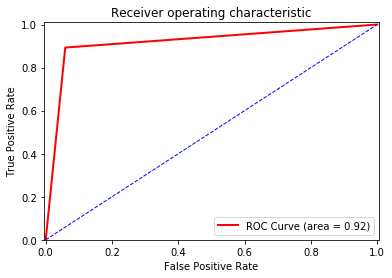

In [10]:
# PART D:

#BAGGING with 29 decision tree clasifiers.

bootstrap_size = (int)(0.8 * X_train.shape[0])

yPredict=[]

for i in range(29):
    X_trainResample, y_trainResample = resample(X_train, y_train, n_samples = bootstrap_size , random_state=i, replace = True)
    my_decisiontree = DecisionTreeClassifier(random_state=2)
    my_decisiontree.fit(X_trainResample, y_trainResample)
    y_predict_dt = my_decisiontree.predict(X_test)
    yPredict.append(y_predict_dt)

#print(yPredict)
    
NewYPredict = []

# VOTING:

for x in range(len(yPredict[0])):
    sum=0
   
    for y in range(len(yPredict)):
        sum = sum + yPredict[y][x]
    
    if sum > 14:
        NewYPredict.append(1)
    else:
        NewYPredict.append(0)

#print(NewYPredict)

# NEW ACCURACY SCORE

score_dt = accuracy_score(y_test, NewYPredict)
print("Accuracy: ",score_dt)

# AUC:
# Creating the area under curve(AUC):

# Predicting the Binary Label:
y_predict = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_decisiontree.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

BaggingDecisionTreeAUC = metrics.auc(fpr, tpr)
print("AUC:" , BaggingDecisionTreeAUC)



# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % BaggingDecisionTreeAUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()


In [11]:
# PART E:

# Creating list of dataset features.
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
                'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

# Initialize variable "X" to the features
X = df[feature_cols] 

# Initialize "y" to the targert.
y = df['Malignant_Cancer']

# Splitting up training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Creating instance of a AdaBoost object classfier. 
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

# We can use the method "fit" of the objects "my_decisiontree"
# along with training dataset and labels to train the model.
my_AdaBoost.fit(X, y)
my_AdaBoost.fit(X_train, y_train)

# Testing on the testing set:

y_predict = my_AdaBoost.predict(X_test)

# Print Accuracy: 

accuracy = accuracy_score(y_test, y_predict)
print("{}{}".format("Accuracy: ", accuracy))

# Creating the area under curve(AUC):

# Predicting the Binary Label:
y_predict = my_AdaBoost.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_AdaBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

AdaBoostAUC = metrics.auc(fpr, tpr)
print("AUC:" , AdaBoostAUC)

Accuracy: 0.9555555555555556
AUC: 0.9653361344537815


In [12]:
# PART F:

# Creating list of dataset features.
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
                'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

# Initialize variable "X" to the features
X = df[feature_cols] 

# Initialize "y" to the targert.
y = df['Malignant_Cancer']

# Splitting up training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Creating instance of a XGboost object classfier. 
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

# We can use the method "fit" of the objects "my_decisiontree"
# along with training dataset and labels to train the model.
my_XGBoost.fit(X, y)
my_XGBoost.fit(X_train, y_train)

# Testing on the testing set:

y_predict = my_XGBoost.predict(X_test)

# Print Accuracy: 

accuracy = accuracy_score(y_test, y_predict)
print("{}{}".format("Accuracy: ", accuracy))

# Creating the area under curve(AUC):

# Predicting the Binary Label:
y_predict = my_XGBoost.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

XGBoostAUC = metrics.auc(fpr, tpr)
print("AUC:" , XGBoostAUC)

Accuracy: 0.9555555555555556
AUC: 0.9621848739495799


/Users/christophercarlson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/christophercarlson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
# PART G:

# Creating list of dataset features.
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
                'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

# Initialize variable "X" to the features
X = df[feature_cols] 

# Initialize "y" to the targert.
y = df['Malignant_Cancer']

# Splitting up training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Creating instance of a RandomForest object classfier. 
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

# We can use the method "fit" of the objects "my_decisiontree"
# along with training dataset and labels to train the model.
my_RandomForest.fit(X, y)
my_RandomForest.fit(X_train, y_train)

# Testing on the testing set:

y_predict = my_RandomForest.predict(X_test)

# Print Accuracy: 

accuracy = accuracy_score(y_test, y_predict)
print("{}{}".format("Accuracy: ", accuracy))

# Creating the area under curve(AUC):

# Predicting the Binary Label:
y_predict = my_RandomForest.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

RandomForestAUC = metrics.auc(fpr, tpr)
print("AUC:" , RandomForestAUC)


Accuracy: 0.9555555555555556
AUC: 0.9516806722689075


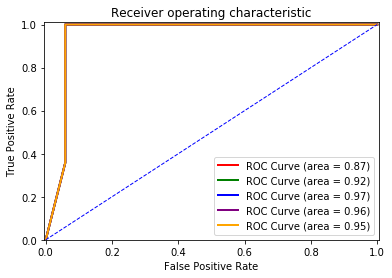

highest AUC the ADAboost Algorithm.
highest Accuracy was the randomForest and xboost Algorithm both sitting at approximately  0.9555555555555556 


In [15]:
# PART H:

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % DecisionTreeAUC)
plt.plot(fpr, tpr, color='green', lw=2, label='ROC Curve (area = %0.2f)' % BaggingDecisionTreeAUC)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % AdaBoostAUC)
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC Curve (area = %0.2f)' % XGBoostAUC)
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve (area = %0.2f)' % RandomForestAUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

print("highest AUC the ADAboost Algorithm.")
print("highest Accuracy was the randomForest and xboost Algorithm both sitting at approximately  0.9555555555555556% ")